In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df=pd.read_csv('./기상대기정보.csv')

In [4]:
df.columns

Index(['지점명', '일시', '지점', '기온(°C)', '강수여부', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)', '전운량(10분위)', 'PM10',
       'PM2.5', 'Ozon', 'CO2', 'CO', 'SO2', '증기압(hPa)', '이슬점온도(°C)', '시정(10m)',
       '지면온도(°C)', '월', '전날기온'],
      dtype='object')

In [5]:
# 기온을 종속변수로 지정
y = df['기온(°C)'].copy()
X = df[df.columns[4:]].copy()

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


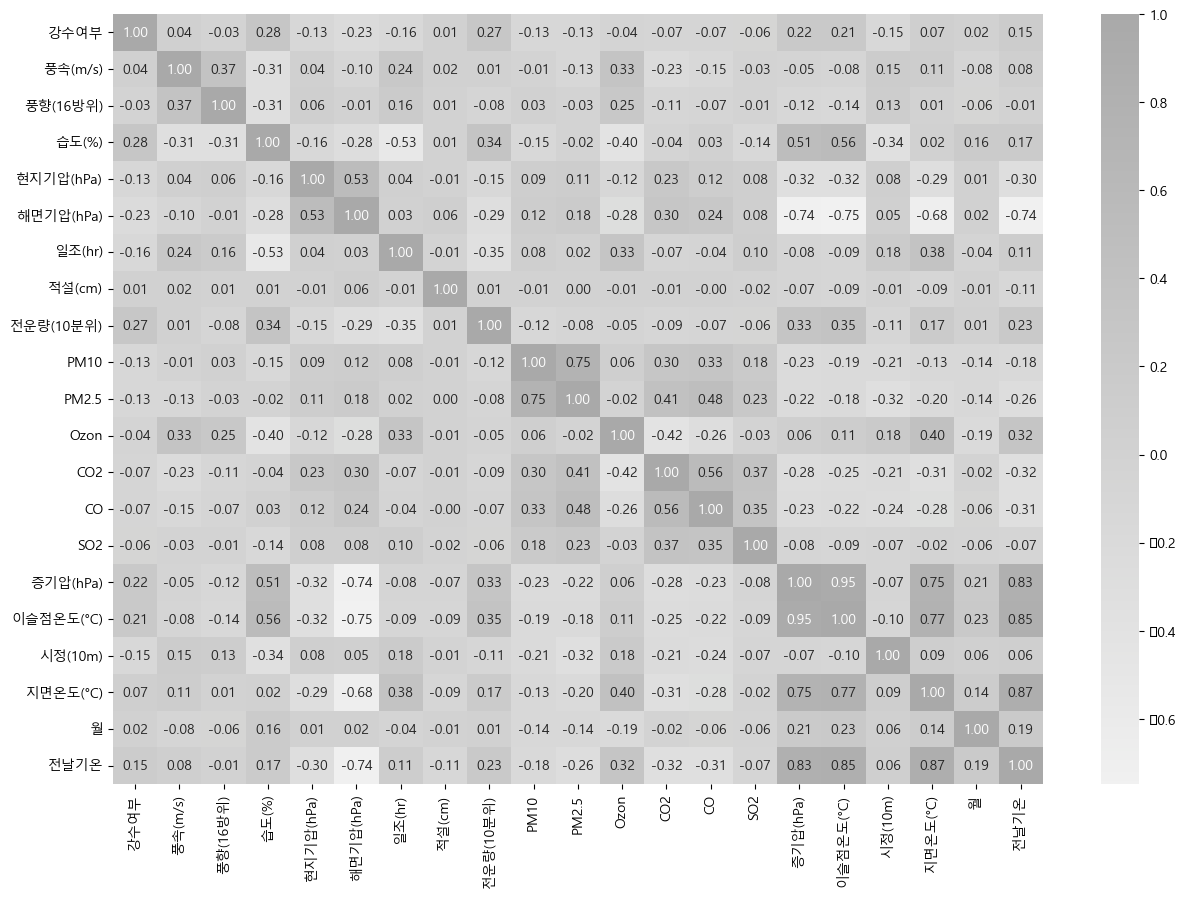

In [6]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap=cmap)

In [7]:
# 범위형 변수 제거
X.drop(columns=['풍향(16방위)', '전운량(10분위)', '월'], axis=1, inplace=True)

In [8]:
# 더미변수 생성
X=pd.get_dummies(data=X, columns=['강수여부'])

In [9]:
scaler = StandardScaler()
scaler.fit(X.iloc[:,:-2])
X_scaled = scaler.transform(X.iloc[:,:-2])
X_scaled = pd.concat([pd.DataFrame(X_scaled), X.iloc[:,-2:]], axis=1)
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,강수여부_0,강수여부_1
0,-0.543788,0.446784,-1.147573,-1.434566,-0.645614,-0.070183,-0.019537,-0.005902,-0.525179,-0.874220,-0.547370,-1.069525,1.997826,1.491758,-0.335595,1.010296,1.163570,1,0
1,-0.725000,0.724630,-1.134416,-1.398729,-0.645614,-0.070183,0.151910,0.123778,-0.472109,-0.874220,-0.547370,-1.069525,2.055110,1.517754,-0.482683,0.937278,1.084297,1,0
2,-0.906212,0.817245,-1.114680,-1.362893,-0.645614,-0.070183,-0.053827,-0.031837,-0.472109,-0.874220,-1.048908,-1.069525,1.974912,1.483093,-0.711672,0.888600,1.024843,1,0
3,-0.543788,1.002476,-1.108102,-1.339001,-0.645614,-0.070183,-0.019537,-0.005902,-0.472109,-0.966012,-1.048908,-1.069525,2.055110,1.517754,-0.667378,0.848035,1.034752,1,0
4,-0.785404,0.956168,-1.075209,-1.291219,-0.645614,-0.070183,0.151910,0.123778,-0.631318,-0.966012,-1.048908,-1.069525,2.100937,1.535084,-0.496890,0.823695,0.955479,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933332,-0.362576,-0.942447,1.247014,1.515987,-0.645614,-0.070183,-0.705324,-0.524618,0.217799,-0.415260,0.455707,0.057104,-1.015332,-1.133754,2.571059,-1.204572,-0.966886,1,0
1933333,-0.241768,-0.710908,1.247014,1.527933,-0.645614,-0.070183,-0.671035,-0.489957,0.058589,-0.139884,0.455707,0.057104,-0.980962,-1.038439,1.854007,-1.269476,-0.956977,1,0
1933334,-0.181364,-0.525678,1.279906,1.587661,-0.645614,-0.070183,-0.602456,-0.489957,0.217799,-0.507052,0.455707,0.057104,-0.958048,-0.977783,1.162861,-1.318155,-1.165068,1,0
1933335,-0.302172,-0.386755,1.253592,1.539878,-0.645614,-0.070183,-0.533878,-0.421115,0.217799,-0.507052,0.455707,0.057104,-0.969505,-1.021109,1.062574,-1.391172,-1.244340,1,0


In [10]:
X_scaled.columns = ['풍속(m/s)', '습도(%)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)', 'PM10', 'PM2.5', 
                    'O3', 'NO2', 'CO', 'SO2', '증기압(hPa)', '이슬점온도(°C)', '시정(10m)', '지면온도(°C)', '전날기온', 
                    '강수여부_0', '강수여부_1']

In [11]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif

,VIF Factor,features
0,1.282310,풍속(m/s)
1,6.320909,습도(%)
2,1.508063,현지기압(hPa)
3,3.590454,해면기압(hPa)
4,2.194225,일조(hr)
5,1.026503,적설(cm)
6,2.388284,PM10
7,2.954484,PM2.5
8,2.230332,O3
9,2.190010,NO2


In [17]:
# vif가 가장 높은 이슬점온도(°C) 제거
X_scaled.drop(columns=['이슬점온도(°C)'], axis=1, inplace=True)

In [18]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif

,VIF Factor,features
0,1.281796,풍속(m/s)
1,3.286038,습도(%)
2,1.505450,현지기압(hPa)
3,3.554263,해면기압(hPa)
4,2.164952,일조(hr)
5,1.021423,적설(cm)
6,2.386740,PM10
7,2.952681,PM2.5
8,2.137356,O3
9,2.120577,NO2


C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


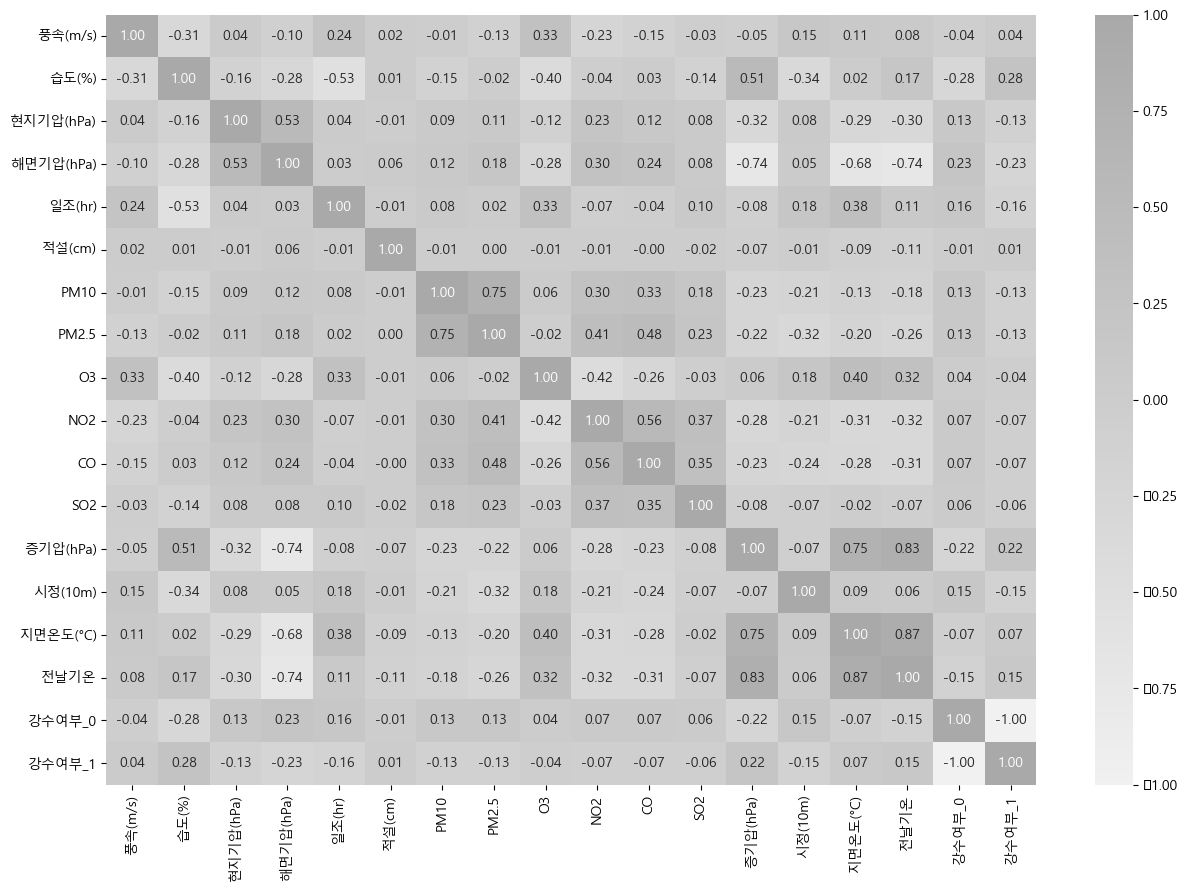

In [19]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [20]:
# 상관계수가 높은 증기압(hPa) 제거
X_scaled.drop(columns=['증기압(hPa)'], axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


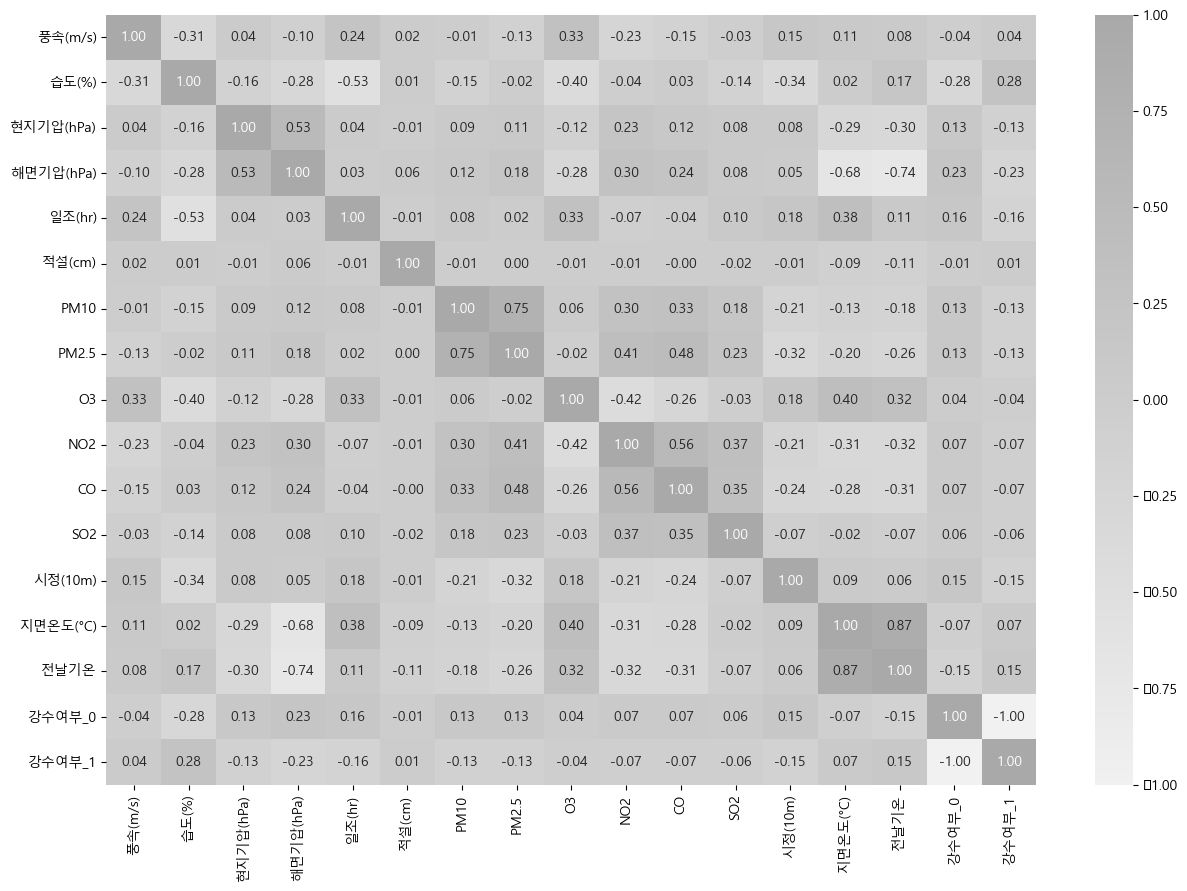

In [21]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [22]:
# 상관계수가 높은 지면온도(°C) 제거
X_scaled.drop(columns=['지면온도(°C)'], axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


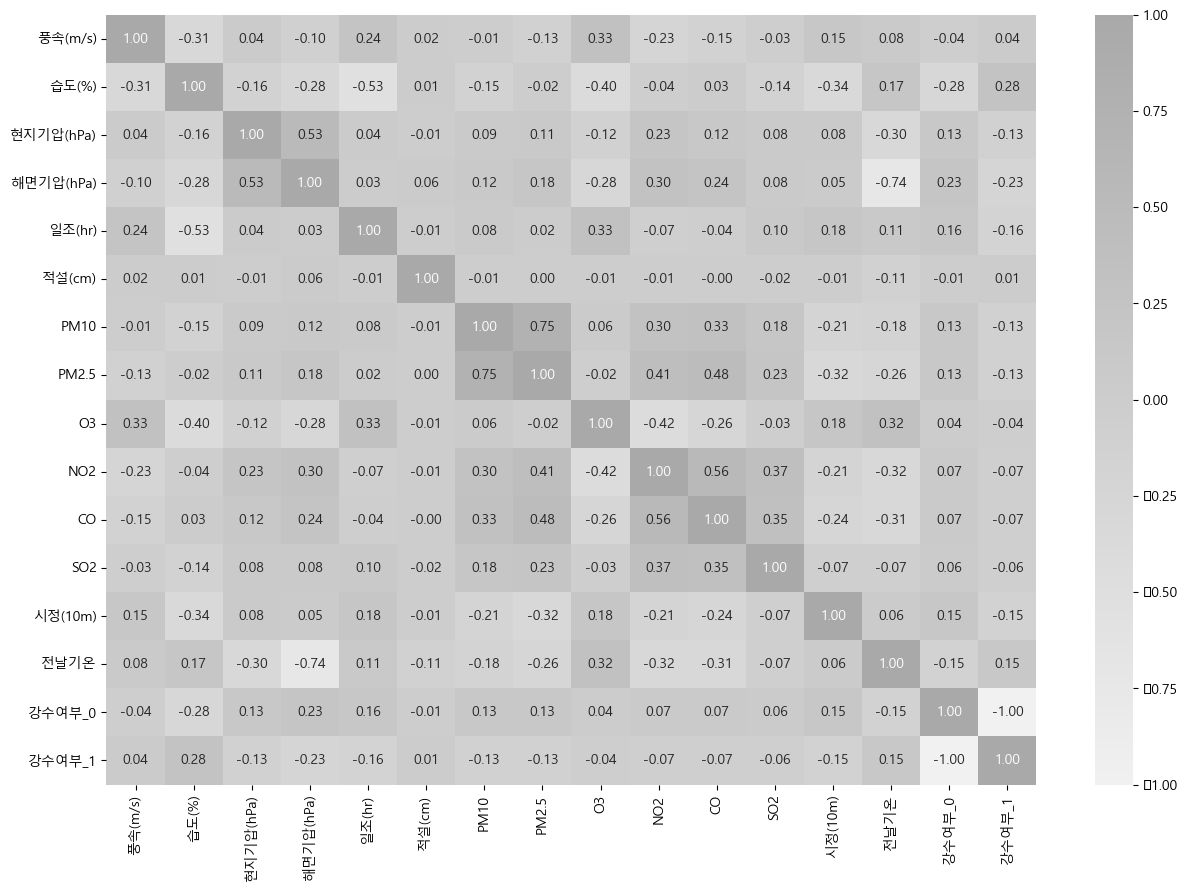

In [23]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [26]:
# 상관계수가 높은 PM2.5 제거
X_scaled.drop(columns=['PM2.5'], axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


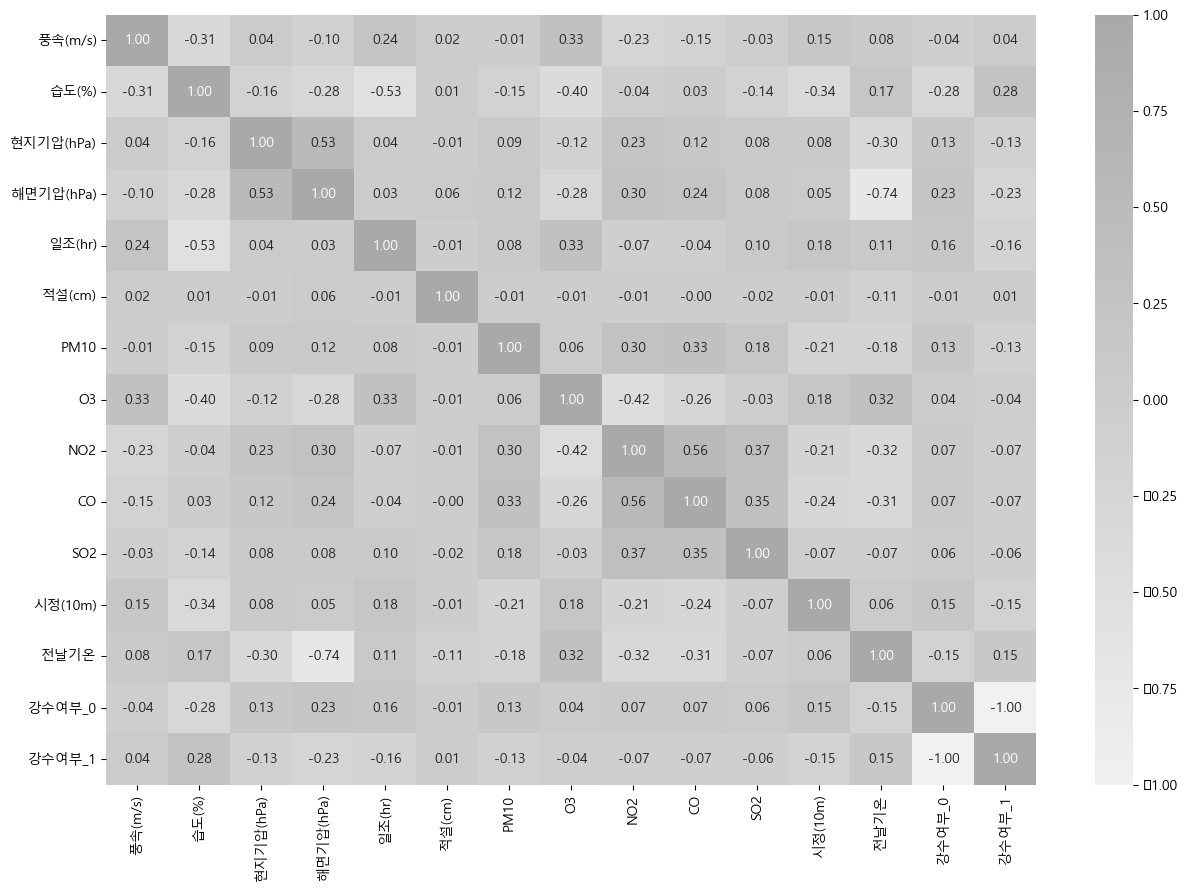

In [27]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [28]:
# 상관계수가 높은 해면기압(hPa) 제거
X_scaled.drop(columns=['해면기압(hPa)'], axis=1, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


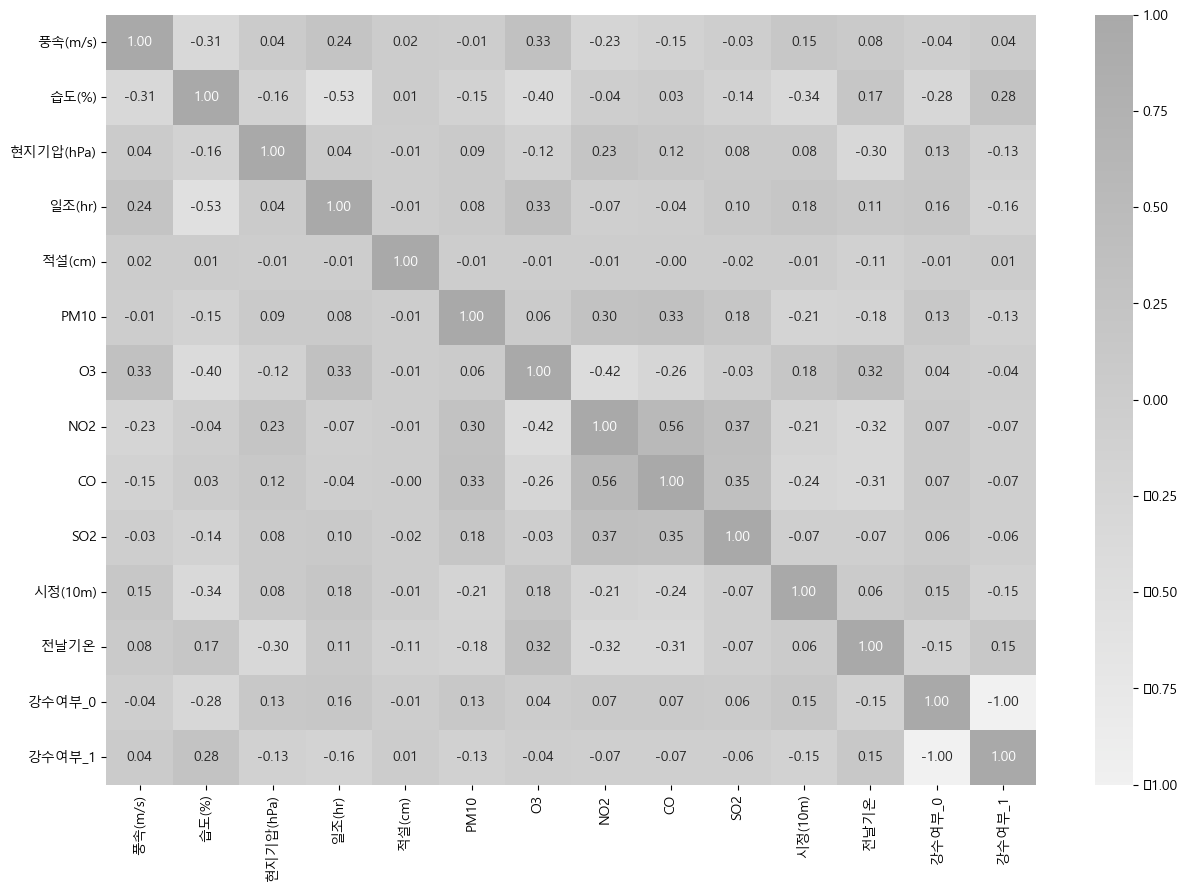

In [29]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [31]:
model = sm.OLS(y, X_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 기온(°C)   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.159e+06
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:51:24   Log-Likelihood:            -5.1113e+06
No. Observations:             1933337   AIC:                         1.022e+07
Df Residuals:                 1933323   BIC:                         1.022e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
풍속(m/s)       -0.2207      0.003    -81.231      0.000      -0.226      -0.215
습도(%)          0.4485      0.004    122.044      0.000       0.441       0.456
현지기압(hPa)     -0.3626      0.003   -137.110      0.000      -0.368      -0.357
일조(hr)         0.8652      0.003    288.235      0.000       0.859       0.871
적설(cm)        -0.1095      0.002    -44.298      0.000      -0.114      -0.105
PM10           0.0112      0.003      4.058      0.000       0.006       0.017
O3             0.7676      0.003    229.583      0.000       0.761       0.774
NO2            0.4047      0.003    115.702      0.000       0.398       0.412
CO            -0.0795      0.003    -25.136      0.000      -0.086      -0.073
SO2            0.1357      0.003     49.533      0.000       0.130       0.141
시정(10m)        0.0102      0.003      3.649      0.000       0.005       0.016
전날기온           9.0517      0.003   2990.167      0.000       9.046       9.058
강수여부_0        13.2997      0.003   5242.329      0.000      13.295      13.305
강수여부_1        12.6012      0.011   1191.834      0.000      12.580      12.622
==============================================================================
Omnibus:                   177227.170   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195264.510
Skew:                          -0.146   Prob(JB):                         0.00
Kurtosis:                       6.841   Cond. No.                         7.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)

(1353335, 14) (580002, 14)


In [33]:
%%time
lin_reg = LinearRegression()
model_lin = lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

CPU times: total: 3.09 s
Wall time: 799 ms


3.406331075732173

In [34]:
print('훈련용:',model_lin.score(X_train, y_train))
print('검증용:',model_lin.score(X_test, y_test))

훈련용: 0.8862933376586359
검증용: 0.8861540992890408


In [35]:
%%time
# 결정나무모델
tree_reg = DecisionTreeRegressor()
model_tree = tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

CPU times: total: 13 s
Wall time: 13 s


4.097797357478106

In [36]:
print('훈련용:',model_tree.score(X_train, y_train))
print('검증용:',model_tree.score(X_test, y_test))

훈련용: 1.0
검증용: 0.835242709821038


In [37]:
%%time
# 랜덤포레스트
forest_reg=RandomForestRegressor(n_jobs=-1) #CPU full 사용
model_forest = forest_reg.fit(X_train, y_train)
y_pred=forest_reg.predict(X_test)
rms=np.sqrt(mean_squared_error(y_test, y_pred))
rms

CPU times: total: 54min 54s
Wall time: 3min 37s


2.8111651018886805

In [38]:
print('훈련용:',model_forest.score(X_train, y_train))
print('검증용:',model_forest.score(X_test, y_test))

훈련용: 0.9890821490706793
검증용: 0.9224616794973444


In [39]:
%%time
#RandomizedSearchCV() 최근에 많이 사용되고 있는 파라미터 최적화 함수
#매개변수의 범위를 지정해주면 무작위로 매개변수를 조합하여 최적의 성능 측정
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={
 'n_estimators': randint(low=1, high=100),
 'max_features': randint(low=1, high=8),
 }
forest_reg=RandomForestRegressor(random_state=0, n_jobs=-1)
rnd_search=RandomizedSearchCV(forest_reg, param_distributions=param_distribs, cv=5, random_state=0)
rnd_search.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 359, in _sendback_result
    result_queue.put(_ResultItem(work_id, result=result,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\externals\loky\backend\queues.py", line 244, in put
    self._writer.send_bytes(obj)
  File "C:\Users\user\anaconda3\lib\multiprocessing\connection.py", line 200, in send_bytes
    se

KeyboardInterrupt: 

In [40]:
cvres=rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(mean_score), params)

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

In [ ]:
%%time
model_RSCV_forest=rnd_search.best_estimator_
y_pred=model_RSCV_forest.predict(X_test)
rms=np.sqrt(mean_squared_error(y_test, y_pred))
rms

In [ ]:
print('훈련용:',model_RSCV_forest.score(X_train, y_train))
print('검증용:',model_RSCV_forest.score(X_test, y_test))